# 🚜BlueBook for Bulldozers

This notebook consist of predicting the bulldozer sales in future by creating the machine learning model based on the bulldozers historical datasets.Since, we are predicting the number so it can be understand that it is a regression related problem. So, for regression problem we use different model:
1. Random Forest Regression
2. Lasso
3. Ridge Regression

After performing some sort of research and understanding the datasets, these models we selected from the [sklearn official documnetation](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

For performing the data analytics we use some python libraries used for machine learning and data visulisation:
1. Pandas
2. Numpy
3. Matplotlib
4. Scikit-Learn

Thoughout the notebook we perform these steps to make ourself on track ad achieve our goal:
1. Problem Defination
2. Data
3. Feature
4. Evalutation
5. Modeling
6. Experimentation

### Table of Content
1. [Problem Defination](#problem-defination)
2. [Data](#data)<br>
    2.1 [Data Dictonary](#data-dictonary)
3. [Feature](#feature)<br>
    3.1 [Exploratory Data Analysis](#eda)<br>
    3.2 [Feature Engineering](#feature-engineering)
4. [Evaluation](#evaluation)
5. [Modeling](#modeling)
6. [Experimentation](#experimentation)<br>
    6.1 [RandomizedSearch CV](#randomizedsearch-cv)<br>
    6.2 [GridSearch CV](#gridsearch-cv)

You can connect me on :
* [Github](https://www.github.com/abhishekv5055)
* [LinkedIn](https://www.linkedin.com/in/abhishek-vaish)
* [Kaggle](https://www.kaggle.com/abhishekv5055)

<a id='problem-defination'></a>

## 1. Problem Defination
>The whole project is based on predicting the bulldozers price in the future using the historical datasets features. We have to analysis which feature is contribute and on what factors condition the price is getting high.

<a id='data'> </a>
## 2. Data
This datasets is downloaded from the Kaggle. You can also downloaded from [here](https://www.kaggle.com/c/bluebook-for-bulldozers/data).

<a id='data-dictonary'></a>
**Data Dictonary** 

You can see the data dictonary of this dataset [here]().
<a id='feature'></a>
## 3. Feature
Feature include the data analytics to understand the data and find the relation between the independent variables and dependent variable and within the independent variables. We also visualize the relation to understand it more better.

So, first we load up our data and do some exploratory data analysis to make some prediction from the datasets.
<a id='eda'></a>
### 3.1 Exploratory Data Analysis (EDA)

In [65]:
# importing all the data visualisation module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# importing all the machine learning model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge

# importing all the evaluation module
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [66]:
# load the datasets
df = pd.read_csv('/content/TrainAndValid.csv', low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7101 entries, 0 to 7100
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   SalesID                   7101 non-null   int64 
 1   SalePrice                 7101 non-null   int64 
 2   MachineID                 7101 non-null   int64 
 3   ModelID                   7101 non-null   int64 
 4   datasource                7101 non-null   int64 
 5   auctioneerID              7101 non-null   int64 
 6   YearMade                  7101 non-null   int64 
 7   MachineHoursCurrentMeter  7101 non-null   int64 
 8   UsageBand                 6200 non-null   object
 9   saledate                  7101 non-null   object
 10  fiModelDesc               7101 non-null   object
 11  fiBaseModel               7101 non-null   object
 12  fiSecondaryDesc           4621 non-null   object
 13  fiModelSeries             975 non-null    object
 14  fiModelDescriptor       

In [68]:
# since our saledate is of type object. so we load up the data in the right type.
df = pd.read_csv('/content/TrainAndValid.csv', low_memory=False, parse_dates=['saledate', 'YearMade'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7101 entries, 0 to 7100
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   7101 non-null   int64         
 1   SalePrice                 7101 non-null   int64         
 2   MachineID                 7101 non-null   int64         
 3   ModelID                   7101 non-null   int64         
 4   datasource                7101 non-null   int64         
 5   auctioneerID              7101 non-null   int64         
 6   YearMade                  7101 non-null   object        
 7   MachineHoursCurrentMeter  7101 non-null   int64         
 8   UsageBand                 6200 non-null   object        
 9   saledate                  7101 non-null   datetime64[ns]
 10  fiModelDesc               7101 non-null   object        
 11  fiBaseModel               7101 non-null   object        
 12  fiSecondaryDesc     

In [70]:
# now we have right format of our saledata data type. now perform some data visualisation.
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


Lets first find out the relation between the sale price and the year of manufacture.

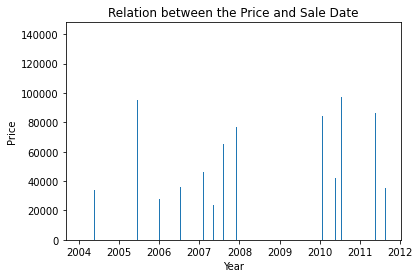

In [71]:
plt.bar(df['saledate'][:500], df['SalePrice'][:500])
plt.xlabel('Year')
plt.ylabel('Price');
plt.title('Relation between the Price and Sale Date');

So, from this graph we conclude that the sale price of the bulldozers goes high between the year 2007-2008. It may be because of the high demand in the market or because of the new technique introduced in this year we cost higher to make the price of the bulldozers high.

Now, Lets find out which year the production of the bulldozers increase. Is it is between the 2007-2008 or it is some other year? Lets find out.

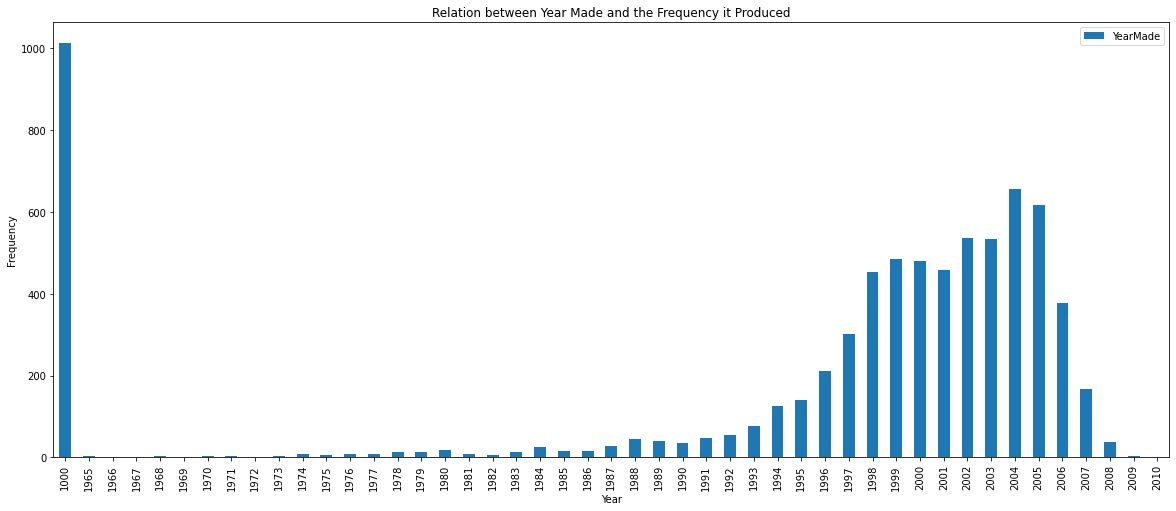

In [72]:
pd.DataFrame((df['YearMade'].value_counts()).sort_index()).plot(kind='bar', figsize=(20, 8))
plt.xlabel('Year')
plt.ylabel('Frequency');
plt.title('Relation between Year Made and the Frequency it Produced');

In the year 1000, the maximum production is produced which is around the 40,000. It may be due to starting era of the world-war I or it may due to some other factors. Lets check out by predicting more relation between the features and label.

Lets find out in which state the production is developed maximum.

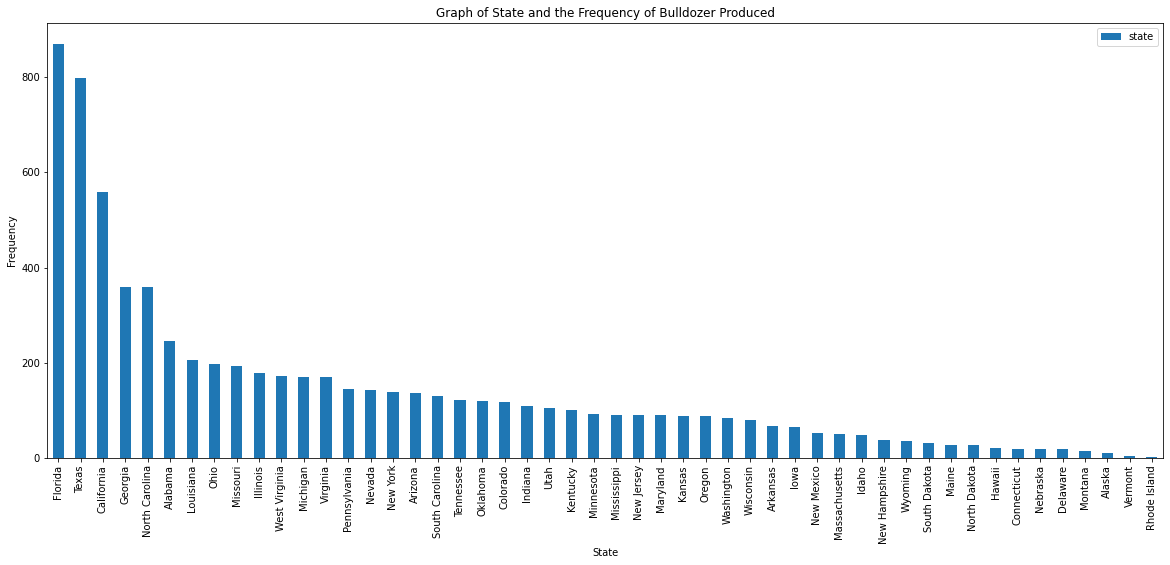

In [73]:
pd.DataFrame(df['state'].value_counts()).plot(kind='bar', figsize=(20, 8))
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Graph of State and the Frequency of Bulldozer Produced');

Florida produced the maximum number of bulldozers. It is around the 68,000 number which is so huge amount from the year 1000 to 2000 year. Since, Florida is a 3rd large producer of raw-steel industry so, it is not such surprising to see that it produces such large amount of bulldozers.

Now, Let's find out the relation between the product size and sale date to check out which size of product is sell in different year.

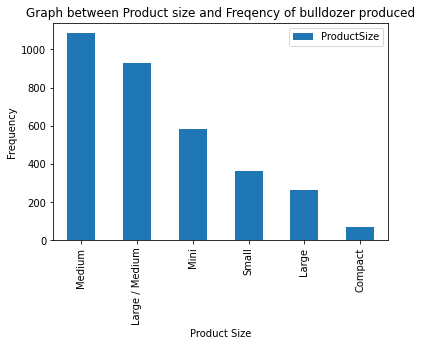

In [74]:
pd.DataFrame(df['ProductSize'].value_counts()).plot(kind='bar')
plt.xlabel('Product Size')
plt.ylabel('Frequency')
plt.title('Graph between Product size and Freqency of bulldozer produced');

This graph shows that Medium size bulldozers was used and produced in a large scale. This show that the market demand and requirement is in the favour of Medium Size product.

Lets create a correlation matrix between all the variables to see how different variables correlate with each other.

In [75]:
df.corr()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,MachineHoursCurrentMeter
SalesID,1.000000,-0.006866,-0.016019,0.000596,NaN,NaN,0.012168
SalePrice,-0.006866,1.000000,-0.166051,-0.048913,NaN,NaN,0.226266
MachineID,-0.016019,-0.166051,1.000000,0.186153,NaN,NaN,0.023197
ModelID,0.000596,-0.048913,0.186153,1.000000,NaN,NaN,-0.160140
datasource,NaN,NaN,NaN,NaN,NaN,NaN,NaN
auctioneerID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MachineHoursCurrentMeter,0.012168,0.226266,0.023197,-0.160140,NaN,NaN,1.000000


Lets make this table visual

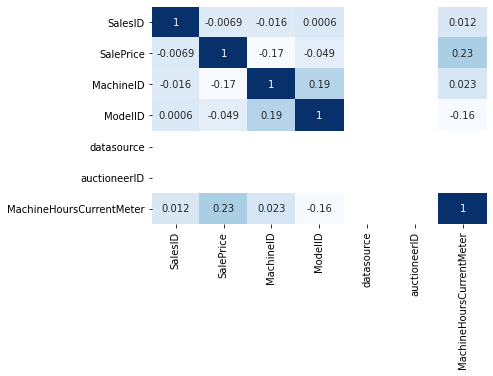

In [76]:
sns.heatmap(df.corr(), annot=True, cmap='Blues', cbar=False);

Let's perform some feature enginering to understand more deeper into the datasets.

<a id='feature-engineering'></a>
### 3.2. Feature Engineering

In this whole section, we manipulate the ```saledate``` feature and dig out the information from it. From that information we create a visual format to understand and explain it easily.

In [77]:
# First of all copy the data into another df to keep our original df safe.
df_tmp = df.copy()

In [78]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


 Now we have a copy of our data. Lets manipulate it to understand more about the data by creating the more fields from the dateseries features by using the pandas library.

In [79]:
df_tmp['Year'] = df_tmp['saledate'].dt.year
df_tmp['Day'] = df_tmp['saledate'].dt.day
df_tmp['Month'] = df_tmp['saledate'].dt.month
df_tmp['MonthStart'] = df_tmp['saledate'].dt.is_month_start
df_tmp['MonthEnd'] = df_tmp['saledate'].dt.is_month_end
df_tmp['YearStart'] = df_tmp['saledate'].dt.is_year_start
df_tmp['YearEnd'] = df_tmp['saledate'].dt.is_year_end
df_tmp['LeapYear'] = df_tmp['saledate'].dt.is_leap_year

In [80]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
MonthStart,False,False,False,False,False
MonthEnd,False,False,False,False,False
YearStart,False,False,False,False,False
YearEnd,False,False,False,False,False


Since we utilize the saledate feature into different feature variable, we drop the saledate feature from the datasets.

In [81]:
df_tmp.drop('saledate', axis=1, inplace=True)

Lets perform some EDA on our new feature and check how they affect the SalePrice column, after all our objective is create a machine learning model for the predicting the SalePrice of the bulldozers.

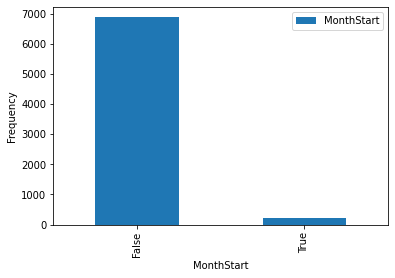

In [82]:
pd.DataFrame(df_tmp['MonthStart'].value_counts()).plot(kind='bar')
plt.xlabel('MonthStart')
plt.ylabel('Frequency');

So, we see that in the starting month bulldozers don't have a good sale. Lets see in the end of the month what graph and the value shows us.

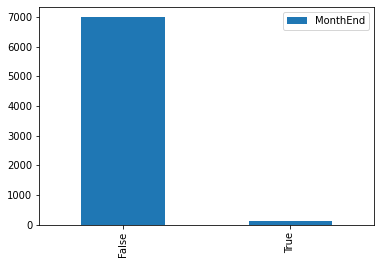

In [83]:
pd.DataFrame(df_tmp['MonthEnd'].value_counts()).plot(kind='bar');

So, the bulldozers are sell in the middle of the month as both the graph have a high value of False.

Lets check the same in the year.

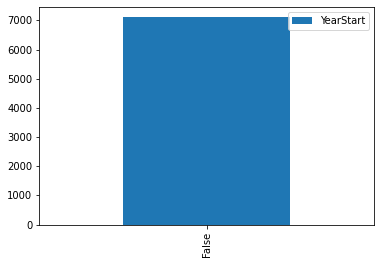

In [84]:
pd.DataFrame(df_tmp['YearStart'].value_counts()).plot(kind='bar');

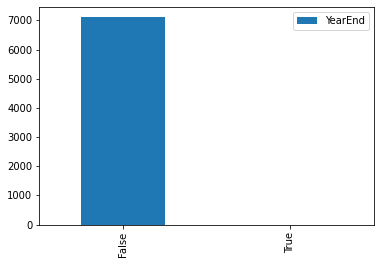

In [85]:
pd.DataFrame(df_tmp['YearEnd'].value_counts()).plot(kind='bar');

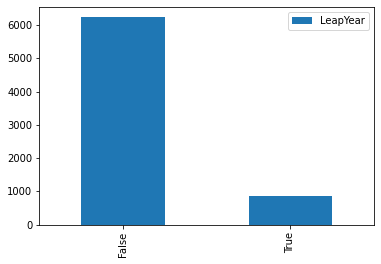

In [86]:
pd.DataFrame(df_tmp['LeapYear'].value_counts()).plot(kind='bar');

Leap Year have good proporation of ratio with non-leap year. Sales of the bulldozers are good in the leap year but in the starting and ending of the year doesnot have good sale. So, bulldozers sales are good in the middle of the year.

We perform the enough EDA on our datasets and understand where we got the high chances of the bulldozers sales and reason for getting the product price high. Now, we perform some machine learning modelling. But before digging into modelling part lets evaluate wheater our data is good for creating the machine learning model.

<a id='evaluation'></a>
## 4. Evalutation

In this section we make our dataset ready for the machine learning model. 
* We fill the missing numerical value in our dataset.
* Convert the object dtype to categorical dtype.
* Fill the categorical missing column by using the categorical codes.

In [87]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7101 entries, 0 to 7100
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   SalesID                   7101 non-null   int64 
 1   SalePrice                 7101 non-null   int64 
 2   MachineID                 7101 non-null   int64 
 3   ModelID                   7101 non-null   int64 
 4   datasource                7101 non-null   int64 
 5   auctioneerID              7101 non-null   int64 
 6   YearMade                  7101 non-null   object
 7   MachineHoursCurrentMeter  7101 non-null   int64 
 8   UsageBand                 6200 non-null   object
 9   fiModelDesc               7101 non-null   object
 10  fiBaseModel               7101 non-null   object
 11  fiSecondaryDesc           4621 non-null   object
 12  fiModelSeries             975 non-null    object
 13  fiModelDescriptor         1730 non-null   object
 14  ProductSize             

In [88]:
df_tmp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
auctioneerID                   0
YearMade                       0
MachineHoursCurrentMeter       0
UsageBand                    901
fiModelDesc                    0
fiBaseModel                    0
fiSecondaryDesc             2480
fiModelSeries               6126
fiModelDescriptor           5371
ProductSize                 3809
fiProductClassDesc             0
state                          0
ProductGroup                   0
ProductGroupDesc               0
Drive_System                5522
Enclosure                      4
Forks                       3510
Pad_Type                    5913
Ride_Control                4726
Stick                       5913
Transmission                4312
Turbocharged                5913
Blade_Extension             6712
Blade_Width                 6712
Enclosure_Type              6712
Engine_Hor

As we see that we a lots of null and object value in our datasets which is suitable for our machine learning model. So, first we have to convert object into numeric one and fill the null value in our datasets.

In [89]:
for label, content in df_tmp.items():
    if pd.api.types.is_float_dtype(content):
        df_tmp[label+'_missing_value'] = pd.isnull(content)
        df_tmp[label] = content.fillna(content.median)

In [90]:
df_tmp.isna().sum()[:10]

SalesID                       0
SalePrice                     0
MachineID                     0
ModelID                       0
datasource                    0
auctioneerID                  0
YearMade                      0
MachineHoursCurrentMeter      0
UsageBand                   901
fiModelDesc                   0
dtype: int64

We fill the float value into numeric one. Lets convert the object value into category dtype and then fill the value in our missing datasets.

In [91]:
df_tmp['UsageBand'].dtype

dtype('O')

In [92]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = df_tmp[label].astype('category').cat.as_ordered()

In [93]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7101 entries, 0 to 7100
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   7101 non-null   int64   
 1   SalePrice                 7101 non-null   int64   
 2   MachineID                 7101 non-null   int64   
 3   ModelID                   7101 non-null   int64   
 4   datasource                7101 non-null   int64   
 5   auctioneerID              7101 non-null   int64   
 6   YearMade                  7101 non-null   category
 7   MachineHoursCurrentMeter  7101 non-null   int64   
 8   UsageBand                 6200 non-null   category
 9   fiModelDesc               7101 non-null   category
 10  fiBaseModel               7101 non-null   category
 11  fiSecondaryDesc           4621 non-null   category
 12  fiModelSeries             975 non-null    category
 13  fiModelDescriptor         1730 non-null   catego

In [94]:
df_tmp['SalePrice'] = df_tmp['SalePrice'].astype('category')

In [95]:
df_tmp.isna().sum()[:10]

SalesID                       0
SalePrice                     0
MachineID                     0
ModelID                       0
datasource                    0
auctioneerID                  0
YearMade                      0
MachineHoursCurrentMeter      0
UsageBand                   901
fiModelDesc                   0
dtype: int64

In [96]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        df_tmp[label] = pd.Categorical(content).codes + 1

In [97]:
df_tmp.isna().sum()[:20]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
dtype: int64

Now we manipulate our data i.e. fill the missing data and convert the object into categorical datatypes. Lets create the machine learning model.

<a id='modeling'></a>
## 5. Modeling

In this section, we train our model and check how much accurate they are at a glance without any change in their hyperparameter. We use three different regression model on our dataset. They are:
1. RandomForest Regressor
2. Lasso Regressor
3. Ridge Regressor

In [98]:
# Save our manipulated datasets
df_tmp.to_csv('/content/modified.csv')

In [99]:
df = pd.read_csv('/content/modified.csv', low_memory=False)

In [167]:
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=6459)

In [119]:
# Lets split the data into train and validation
df_valid = df_tmp[df['Year'] == 2011]

In [120]:
df_train = df_tmp[df['Year'] != 2011]

In [121]:
df_train.shape

(6459, 106)

In [122]:
df_valid.shape

(642, 106)

In [123]:
# Lets split the training datasets into X and y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']

Lets train the model using the RandomForest Regression without changing any hyperparameter.

In [168]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=6459, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [125]:
X_test, y_test = df_valid.drop('SalePrice', axis=1), df_valid['SalePrice']

In [126]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': 7000,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [127]:
rf_score = rf_model.score(X_test, y_test)

In [128]:
df["Year"].value_counts()

2006    1326
2007    1287
2009    1251
2010     863
2005     859
2011     642
2004     614
2008     259
Name: Year, dtype: int64

Now, we use Lasso Regression and check what increment and decrement we get compare to RandomForest Regression.

In [129]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16258.974728756584, tolerance: 1402.893503297724
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [130]:
lasso_score = lasso_model.score(X_test, y_test)

Lets check out the Ridge Regression and see how much percentage it get accurate in the training phase.

In [131]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_score = ridge_model.score(X_test, y_test)

Lets make the score more visual.

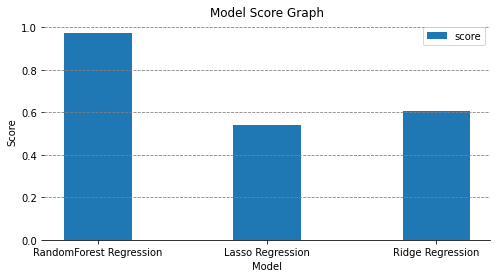

In [169]:
score = {"RandomForest Regression": rf_score,
         "Lasso Regression": lasso_score,
         "Ridge Regression": ridge_score
}

fig, ax = plt.subplots(figsize=(8, 4))
plt.bar(score.keys(), score.values(), width=0.4)
plt.xticks(ticks=[0, 1, 2], labels=score.keys());
plt.title('Model Score Graph')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(labels=['score'], loc='upper right', fancybox=True)
plt.grid(color='grey', linestyle='--', axis='y');

RandomForest Regression and Ridge Regression are the top two from the three. So, we drop the third one and start performing experimentation on this two by changing the hyperparameter tuning.

<a id='experimentation'></a>
## 6. Experimentation

In the Experimentation phase we tried to achieved the 90% accurate model and if we get the accuracy of RandomForest Regressor higher than the 90%, then we stop our experimentation and check out, whether our model is not dealing up with the overfitting and underfitting situation.

For achieving our goal, we use two different types of methods:
1. RandomizedSearch CV
2. GridSearch CV

<a id='randomizedsearch-cv'></a>
### 6.1 RandomizedSearch CV
Since our dataset is too large to train the model at once. It takes too much time while fiting the model, so we convert our work in different steps to reduce the experimentation time and focus on making our model more accurate.
1. Create a function which give us a model object using RandomizedSearch CV.
2. Divide the dataset into mini dataset (25% of original dataset) so that it take less time while training the model.
3. Train the model.
4. Scoring the model.

In [133]:
def randomized_evaluation(estimator, grid):
    '''
    This function is used to create the model object using the RandomizedSearch CV.
    model: machine learning model
    grid: hyperparameter dictnary
    '''
    model = RandomizedSearchCV(estimator, 
                       param_distributions=grid, 
                       n_iter=2, 
                       n_jobs=-1, 
                       cv=5, 
                       verbose=True, 
                       random_state=42)
    return model

In [155]:
forest_grid = {"n_estimators": [70, 90, 100],
               "min_samples_split": [2, 10, 20],
               "max_samples": [6459]
}

In [156]:
rf_rs_model = randomized_evaluation(RandomForestRegressor(random_state=42), forest_grid)

In [157]:
rf_rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [158]:
rf_rs_model.best_params_

{'max_samples': 6459, 'min_samples_split': 20, 'n_estimators': 90}

In [160]:
rf_rs_score = rf_rs_model.score(X_test, y_test)

<a id ='gridsearch-cv'></a>
### 6.2 GridSearch CV

In [140]:
def gridsearch_evaluation(estimator, grid):
    model = GridSearchCV(estimator=estimator, 
                         param_grid=grid,
                         cv=5,
                         n_jobs=-1,
                         verbose=True)
    return model

In [149]:
forest_gs_grid = {"n_estimators": [90, 100],
               "min_samples_split": [10, 20],
               "max_samples": [6459]
               }
rf_gs_model = gridsearch_evaluation(RandomForestRegressor(random_state=42), forest_gs_grid)
rf_gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [150]:
rf_gs_score = rf_gs_model.score(X_test, y_test)

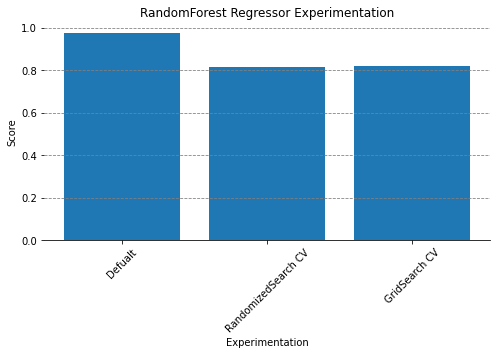

In [161]:
score = {"Defualt": rf_score,
         "RandomizedSearch CV": rf_rs_score,
         "GridSearch CV": rf_gs_score
}

fig, ax = plt.subplots(figsize=(8,4))
plt.bar(score.keys(), score.values())
plt.xlabel('Experimentation')
plt.ylabel('Score')
plt.title('RandomForest Regressor Experimentation')
plt.grid(color='grey', linestyle='--', axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(rotation=45);


So, from the above visualization we can see that RandomForest Regressor by default prediciting the value pretty well. So, Now from the Kaggle Challenge now we have to find out the ```Root Mean Square Log Error``` for checking the errorness in the current best model i.e. RandomForest Regressor without hyperparameter.

In [162]:
y_preds = rf_model.predict(X_test)

In [163]:
from sklearn.metrics import mean_squared_log_error

In [164]:
rmsle = np.sqrt(mean_squared_log_error(y_test, y_preds))

In [165]:
rmsle

0.15877735810975954

Since we have good score in the Root Mean Square Log Error. So, we stop predicting and training our model here.
Thank You.